In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, BatchNormalization, Bidirectional
from keras_tuner import RandomSearch
# Download latest version
import kagglehub
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gooogle-stock-price


In [2]:
# Load and Preprocess Data
df_test = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
df_train = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
df = pd.concat([df_test, df_train])

# Use only the "Open" column
df = df.loc[:, ["Open"]].values
train = df[:len(df) - 50]
test = df[len(train):]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [3]:
# Prepare Training Data
X_train, y_train = [], []
timesteps = 50
for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [4]:
# Vanilla RNN Model
rnn_model = Sequential([
    SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(units=50, activation='tanh', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=50, activation='tanh'),
    Dropout(0.2),
    Dense(units=1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


I0000 00:00:1733462948.207680      92 service.cc:145] XLA service 0x79582c0b7580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733462948.207742      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733462948.207748      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 7/37 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3482

I0000 00:00:1733462952.845899      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - loss: 0.2549
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1084
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0633
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0418
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0321
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0259
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0239
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0186
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0170
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0090
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083
Epoch 16/50
3

In [5]:
# LSTM Model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0750
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 16/50
37/37

In [6]:
# GRU Model
gru_model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0800
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 16/50
37/37 

In [7]:
# Prepare Test Data
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test).reshape(len(X_test), timesteps, 1)

In [8]:
# Predictions
rnn_pred = scaler.inverse_transform(rnn_model.predict(X_test))
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test))
gru_pred = scaler.inverse_transform(gru_model.predict(X_test))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [9]:
# Calculate Errors
rnn_mse = mean_squared_error(test, rnn_pred)
rnn_mae = mean_absolute_error(test, rnn_pred)
lstm_mse = mean_squared_error(test, lstm_pred)
lstm_mae = mean_absolute_error(test, lstm_pred)
gru_mse = mean_squared_error(test, gru_pred)
gru_mae = mean_absolute_error(test, gru_pred)

# Print Errors
print(f"RNN - MSE: {rnn_mse}, MAE: {rnn_mae}")
print(f"LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}")
print(f"GRU - MSE: {gru_mse}, MAE: {gru_mae}")


RNN - MSE: 126.81443645565372, MAE: 8.985799804687495
LSTM - MSE: 277.94337909942425, MAE: 13.72154223632812
GRU - MSE: 147.96396951840083, MAE: 9.428068505859368


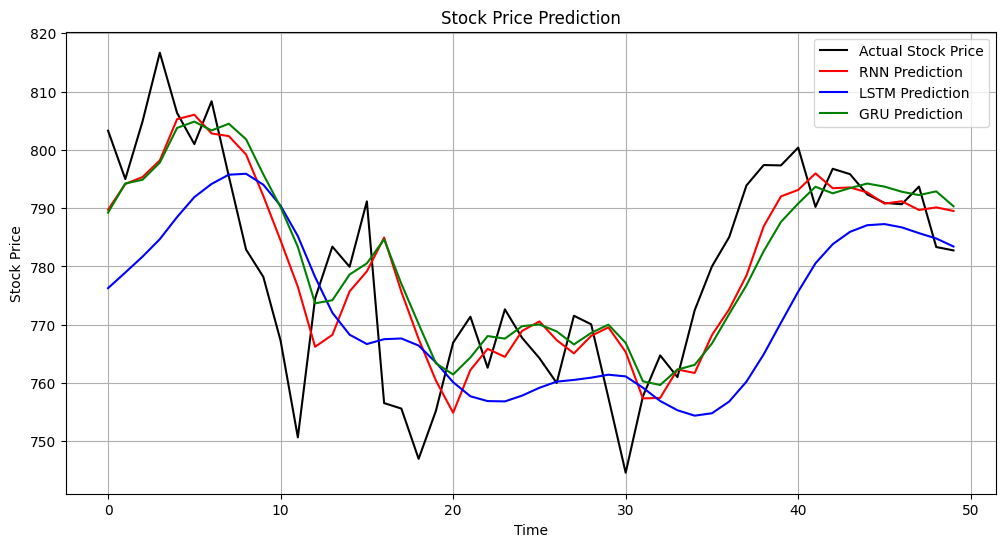

In [10]:
# Visualization: Predictions
plt.figure(figsize=(12, 6))
plt.plot(test, color='black', label='Actual Stock Price')
plt.plot(rnn_pred, color='red', label='RNN Prediction')
plt.plot(lstm_pred, color='blue', label='LSTM Prediction')
plt.plot(gru_pred, color='green', label='GRU Prediction')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


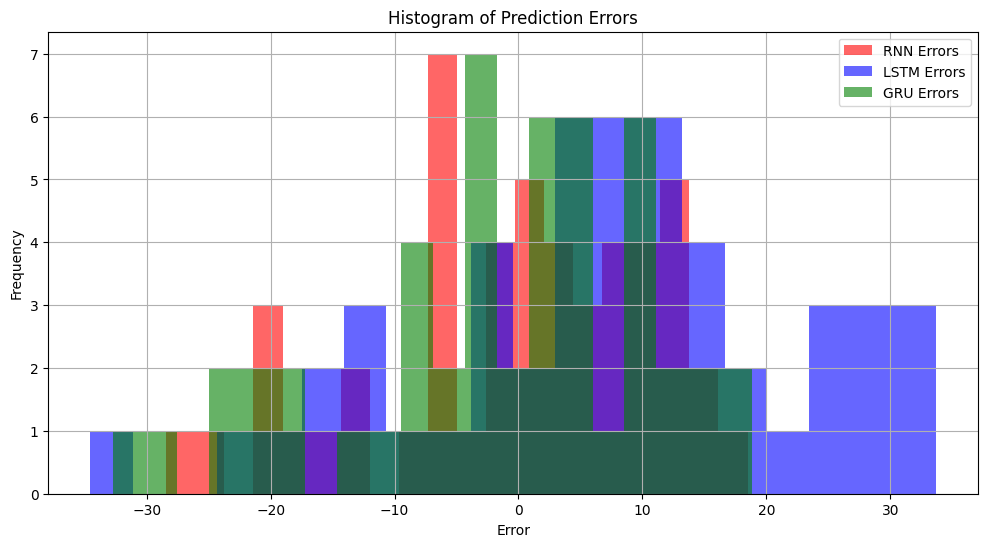

In [11]:
# Compute Errors for Histogram
rnn_errors = test.flatten() - rnn_pred.flatten()
lstm_errors = test.flatten() - lstm_pred.flatten()
gru_errors = test.flatten() - gru_pred.flatten()

# Histogram of Errors
plt.figure(figsize=(12, 6))
plt.hist(rnn_errors, bins=20, alpha=0.6, label='RNN Errors', color='red')
plt.hist(lstm_errors, bins=20, alpha=0.6, label='LSTM Errors', color='blue')
plt.hist(gru_errors, bins=20, alpha=0.6, label='GRU Errors', color='green')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Custom RNN Model
custom_rnn_model = Sequential([
    Bidirectional(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(SimpleRNN(units=100, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(SimpleRNN(units=100)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=50, activation='relu'),
    Dense(units=1)
])
custom_rnn_model.compile(optimizer='adam', loss='mean_squared_error')
custom_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 3/37 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 2.1601 

I0000 00:00:1733463074.021570      91 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 4 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - loss: 1.2984
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4293
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2550
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2160
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1876
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1713
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1423
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1255
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1002
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0864
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0753
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0617
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0509
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0366
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0373
Epoch 16/50
3

In [13]:
# Custom LSTM Model
custom_lstm_model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(LSTM(units=100, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(LSTM(units=100)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=50, activation='relu'),
    Dense(units=1)
])
custom_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
custom_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 1.1742
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2772
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1671
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1399
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0890
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0938
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0714
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0671
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0599
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0543
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0472
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0362
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0293
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0296
Epoc

In [14]:
# Custom GRU Model
custom_gru_model = Sequential([
    Bidirectional(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(GRU(units=100, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(GRU(units=100)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=50, activation='relu'),
    Dense(units=1)
])
custom_gru_model.compile(optimizer='adam', loss='mean_squared_error')
custom_gru_model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.3083
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2871
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1915
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1502
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1179
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0862
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0815
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0670
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0596
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0451
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0377
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0315
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0320
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0248
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0240
Epoc

In [15]:
custom_rnn_pred = scaler.inverse_transform(custom_rnn_model.predict(X_test))
custom_lstm_pred = scaler.inverse_transform(custom_lstm_model.predict(X_test))
custom_gru_pred = scaler.inverse_transform(custom_gru_model.predict(X_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


In [16]:
# Calculate Errors
def print_errors(name, test, pred):
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)
    print(f"{name} - MSE: {mse}, MAE: {mae}")

print_errors("RNN", test, rnn_pred)
print_errors("LSTM", test, lstm_pred)
print_errors("GRU", test, gru_pred)
print_errors("Custom RNN", test, custom_rnn_pred)
print_errors("Custom LSTM", test, custom_lstm_pred)
print_errors("Custom GRU", test, custom_gru_pred)

RNN - MSE: 126.81443645565372, MAE: 8.985799804687495
LSTM - MSE: 277.94337909942425, MAE: 13.72154223632812
GRU - MSE: 147.96396951840083, MAE: 9.428068505859368
Custom RNN - MSE: 2758.557740542068, MAE: 49.70075219726563
Custom LSTM - MSE: 1530.0693538984667, MAE: 36.119303955078124
Custom GRU - MSE: 861.7568921812905, MAE: 25.479609423828123


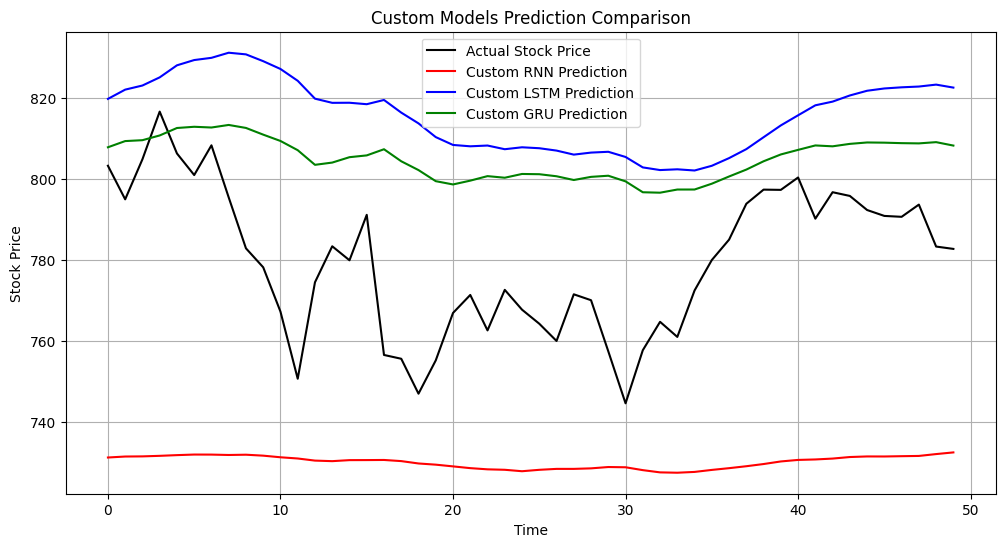

In [17]:
# Visualization: Predictions
plt.figure(figsize=(12, 6))
plt.plot(test, color='black', label='Actual Stock Price')
plt.plot(custom_rnn_pred, color='red', label='Custom RNN Prediction')
plt.plot(custom_lstm_pred, color='blue', label='Custom LSTM Prediction')
plt.plot(custom_gru_pred, color='green', label='Custom GRU Prediction')
plt.title('Custom Models Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


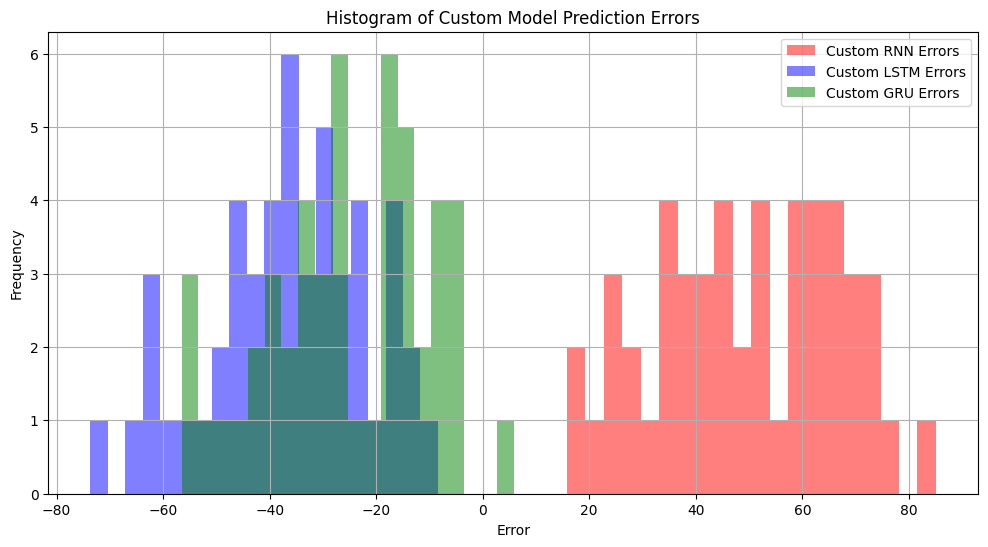

In [18]:
# Histogram of Errors
custom_rnn_errors = test.flatten() - custom_rnn_pred.flatten()
custom_lstm_errors = test.flatten() - custom_lstm_pred.flatten()
custom_gru_errors = test.flatten() - custom_gru_pred.flatten()

plt.figure(figsize=(12, 6))
plt.hist(custom_rnn_errors, bins=20, alpha=0.5, label='Custom RNN Errors', color='red')
plt.hist(custom_lstm_errors, bins=20, alpha=0.5, label='Custom LSTM Errors', color='blue')
plt.hist(custom_gru_errors, bins=20, alpha=0.5, label='Custom GRU Errors', color='green')
plt.title('Histogram of Custom Model Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Hyperparameter Tuning Functions
def build_rnn_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int(f'units_{i}', 32, 128, step=32),
                            activation='tanh',
                            return_sequences=(i < hp.Int('num_layers', 1, 3) - 1),
                            input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_lstm_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'units_{i}', 32, 128, step=32),
                       activation='tanh',
                       return_sequences=(i < hp.Int('num_layers', 1, 3) - 1),
                       input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_gru_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(GRU(units=hp.Int(f'units_{i}', 32, 128, step=32),
                      activation='tanh',
                      return_sequences=(i < hp.Int('num_layers', 1, 3) - 1),
                      input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [22]:
# Split Training Data into Training and Validation Sets
split = int(len(X_train) * 0.8)
X_val, y_val = X_train[split:], y_train[split:]
X_train, y_train = X_train[:split], y_train[:split]
# Update the Tuning Process
def tune_model_updated(build_fn, model_name):
    tuner = RandomSearch(
        build_fn,
        objective='val_loss',  # Use validation loss for tuning
        max_trials=10,  # Increased trials
        executions_per_trial=3,  # Average over 3 executions
        directory='updated_tuner_dir',
        project_name=model_name
    )
    tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=2)  # Longer epochs
    return tuner.get_best_hyperparameters()[0], tuner.get_best_models()[0]


In [23]:
# Retune Vanilla RNN
print("Retuning Vanilla RNN...")
best_rnn_hp, best_rnn_model = tune_model_updated(build_rnn_model, 'rnn_updated')

# Retune LSTM
print("Retuning LSTM...")
best_lstm_hp, best_lstm_model = tune_model_updated(build_lstm_model, 'lstm_updated')

# Retune GRU
print("Retuning GRU...")
best_gru_hp, best_gru_model = tune_model_updated(build_gru_model, 'gru_updated')

Trial 10 Complete [00h 00m 30s]
val_loss: 0.0002906350224899749

Best val_loss So Far: 0.00023097419762052596
Total elapsed time: 00h 05m 13s


In [24]:
# Predictions
rnn_pred = scaler.inverse_transform(best_rnn_model.predict(X_test))
lstm_pred = scaler.inverse_transform(best_lstm_model.predict(X_test))
gru_pred = scaler.inverse_transform(best_gru_model.predict(X_test))



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [25]:
# Calculate Errors
print_errors("Retuned RNN", test, rnn_pred)
print_errors("Retuned LSTM", test, lstm_pred)
print_errors("Retuned GRU", test, gru_pred)

Retuned RNN - MSE: 255.41207844673863, MAE: 14.11444951171875
Retuned LSTM - MSE: 321.81105043536587, MAE: 15.113487744140626
Retuned GRU - MSE: 141.75994653129442, MAE: 9.947390332031246


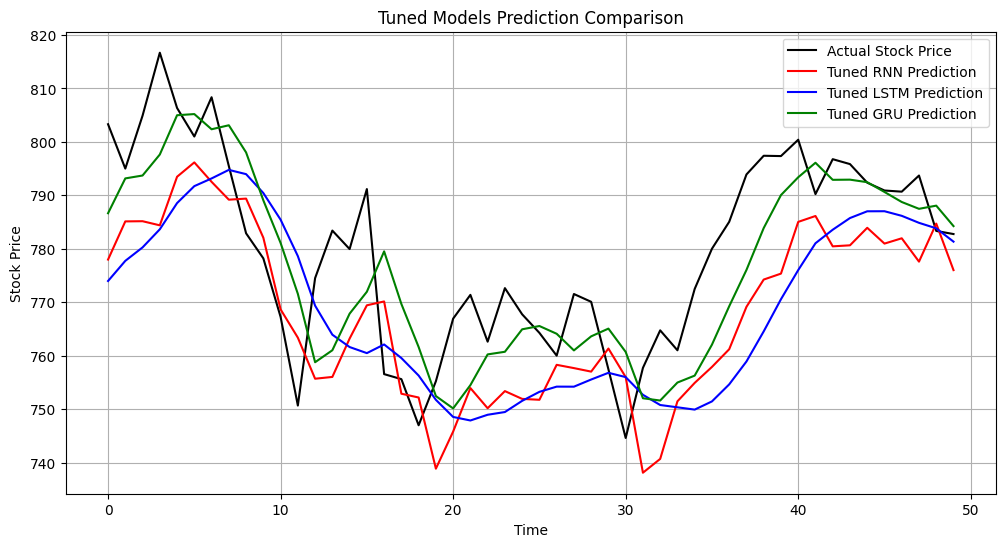

In [26]:
# Visualization: Predictions
plt.figure(figsize=(12, 6))
plt.plot(test, color='black', label='Actual Stock Price')
plt.plot(rnn_pred, color='red', label='Tuned RNN Prediction')
plt.plot(lstm_pred, color='blue', label='Tuned LSTM Prediction')
plt.plot(gru_pred, color='green', label='Tuned GRU Prediction')
plt.title('Tuned Models Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

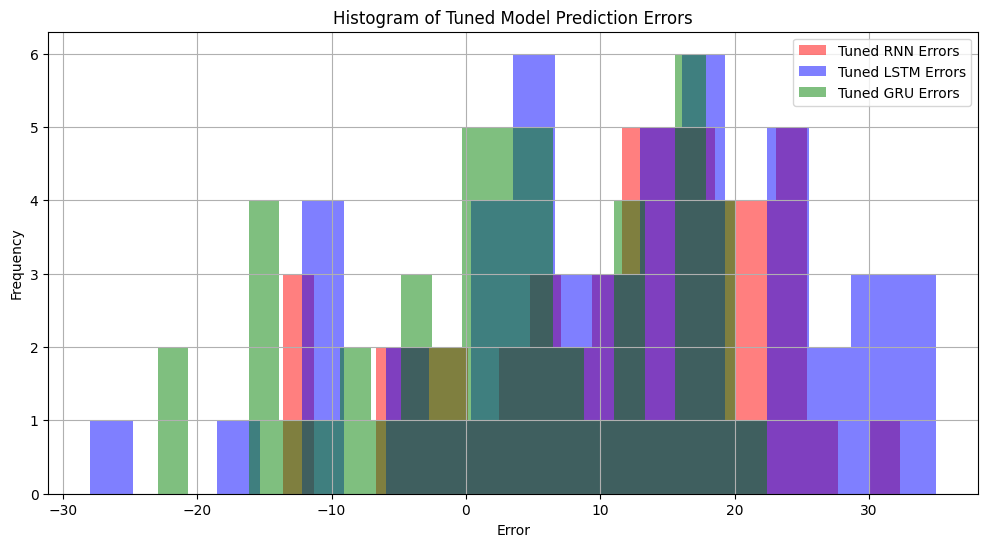

In [27]:
# Histogram of Errors
rnn_errors = test.flatten() - rnn_pred.flatten()
lstm_errors = test.flatten() - lstm_pred.flatten()
gru_errors = test.flatten() - gru_pred.flatten()

plt.figure(figsize=(12, 6))
plt.hist(rnn_errors, bins=20, alpha=0.5, label='Tuned RNN Errors', color='red')
plt.hist(lstm_errors, bins=20, alpha=0.5, label='Tuned LSTM Errors', color='blue')
plt.hist(gru_errors, bins=20, alpha=0.5, label='Tuned GRU Errors', color='green')
plt.title('Histogram of Tuned Model Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()